<a href="https://colab.research.google.com/github/KashyapBhat/MyPathTowardsMachineLearning/blob/master/Tensorflow_Studies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow

### Why Machine Learning

Like every first app you should start with something super simple that shows the overall scaffolding for how your code works. 

In the case of creating neural networks, the sample I like to use is one where it learns the relationship between two numbers. So, for example, if you were writing code for a function like this, you already know the 'rules' — 


```
float hw_function(float x){
    float y = (2 * x) - 1;
    return y;
}
```

So how would you train a neural network to do the equivalent task? Using data! By feeding it with a set of Xs, and a set of Ys, it should be able to figure out the relationship between them. 

This is obviously a very different paradigm than what you might be used to, so let's step through it piece by piece.


****************************************************************************************************

# **1. Simple example problem using tf**

### Lets get started
We then import a library called numpy, which helps us to represent our data as lists easily and quickly.
The framework for defining a neural network as a set of Sequential layers is called keras, so we import that too.

In [0]:


import tensorflow as tf
import numpy as np
from tensorflow import keras

### Define the Neural Network

Next we will create the simplest possible neural network. It has 1 layer, and that layer has 1 neuron, and the input shape to it is just 1 value.


In [0]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

### Compile the Neural Network

Now we compile our Neural Network. When we do so, we have to specify 2 functions, a loss and an optimizer.

If you've seen lots of math for machine learning, here's where it's usually used, but in this case it's nicely encapsulated in functions for you. But what happens here — let's explain...

We know that in our function, the relationship between the numbers is y=2x-1. 

When the computer is trying to 'learn' that, it makes a guess...maybe y=10x+10. The LOSS function measures the guessed answers against the known correct answers and measures how well or how badly it did.

It then uses the OPTIMIZER function to make another guess. Based on how the loss function went, it will try to minimize the loss. At that point maybe it will come up with somehting like y=5x+5, which, while still pretty bad, is closer to the correct result (i.e. the loss is lower)

It will repeat this for the number of EPOCHS which you will see shortly. But first, here's how we tell it to use 'MEAN SQUARED ERROR' for the loss and 'STOCHASTIC GRADIENT DESCENT' for the optimizer. You don't need to understand the math for these yet, but you can see that they work! :)

Over time you will learn the different and appropriate loss and optimizer functions for different scenarios. 


In [0]:
model.compile(optimizer='sgd', loss='mean_squared_error')

## Providing the Data

Next up we'll feed in some data. In this case we are taking 6 xs and 6ys. You can see that the relationship between these is that y=2x-1, so where x = -1, y=-3 etc. etc. 

A python library called 'Numpy' provides lots of array type data structures that are a defacto standard way of doing it. We declare that we want to use these by specifying the values as an np.array[]

In [0]:
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

## Training the model

The process of training the neural network, where it 'learns' the relationship between the Xs and Ys is in the **model.fit**  call. This is where it will go through the loop we spoke about above, making a guess, measuring how good or bad it is (aka the loss), using the opimizer to make another guess etc. It will do it for the number of epochs you specify. When you run this code, you'll see the loss on the right hand side.

In [5]:
model.fit(xs, ys, epochs=500,verbose=0)

## Make a prediction

Ok, now you have a model that has been trained to learn the relationshop between X and Y. You can use the **model.predict** method to have it figure out the Y for a previously unknown X. So, for example, if X = 10, what do you think Y will be? Take a guess before you run this code:

In [6]:
print(model.predict([10.0]))

[[18.982]]


You might have thought 19, right? But it ended up being a little under. Why do you think that is? 

Remember that neural networks deal with probabilities, so given the data that we fed the NN with, it calculated that there is a very high probability that the relationship between X and Y is Y=2X-1, but with only 6 data points we can't know for sure. As a result, the result for 10 is very close to 19, but not necessarily 19. 

As you work with neural networks, you'll see this pattern recurring. You will almost always deal with probabilities, not certainties, and will do a little bit of coding to figure out what the result is based on the probabilities, particularly when it comes to classification.


**********************************************************************************************

# **2. House price prediction**

In this exercise you'll try to build a neural network that predicts the price of a house according to a simple formula.

So, imagine if house pricing was as easy as a house costs 50k + 50k per bedroom, so that a 1 bedroom house costs 100k, a 2 bedroom house costs 150k etc.

How would you create a neural network that learns this relationship so that it would predict a 7 bedroom house as costing close to 400k etc.

Hint: Your network might work better if you scale the house price down. You don't have to give the answer 400...it might be better to create something that predicts the number 4, and then your answer is in the 'hundreds of thousands' etc.

In [0]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [0]:
class PrintLogs(tf.keras.callbacks.Callback):
    def __init__(self, epochs):
        self.epochs = epochs

    def set_params(self, params):
        params['epochs'] = 0

    def on_epoch_begin(self, epoch, logs=None):
        print('Epoch %d/%d' % (epoch + 1, self.epochs), end='')

In [0]:
# GRADED FUNCTION: house_model
def house_model(y_new):
    xs = np.array([1,2,3,4,5,6,10], dtype=float)
    ys = np.array([1,1.5,2,2.5,3,3.5,5.5], dtype=float)
    model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
    model.compile(optimizer='sgd', loss='mean_squared_error')
    model.fit(xs, ys, epochs=200, verbose=2, callbacks=[PrintLogs(200)])       # Increasing the epochs will yeild better results
    return model.predict(y_new)[0]

In [10]:
prediction = house_model([7.0])

Epoch 1/2001/1 - 0s - loss: 28.3511
Epoch 2/2001/1 - 0s - loss: 5.5084
Epoch 3/2001/1 - 0s - loss: 1.0905
Epoch 4/2001/1 - 0s - loss: 0.2358
Epoch 5/2001/1 - 0s - loss: 0.0702
Epoch 6/2001/1 - 0s - loss: 0.0380
Epoch 7/2001/1 - 0s - loss: 0.0314
Epoch 8/2001/1 - 0s - loss: 0.0299
Epoch 9/2001/1 - 0s - loss: 0.0294
Epoch 10/2001/1 - 0s - loss: 0.0290
Epoch 11/2001/1 - 0s - loss: 0.0287
Epoch 12/2001/1 - 0s - loss: 0.0284
Epoch 13/2001/1 - 0s - loss: 0.0281
Epoch 14/2001/1 - 0s - loss: 0.0277
Epoch 15/2001/1 - 0s - loss: 0.0274
Epoch 16/2001/1 - 0s - loss: 0.0271
Epoch 17/2001/1 - 0s - loss: 0.0268
Epoch 18/2001/1 - 0s - loss: 0.0266
Epoch 19/2001/1 - 0s - loss: 0.0263
Epoch 20/2001/1 - 0s - loss: 0.0260
Epoch 21/2001/1 - 0s - loss: 0.0257
Epoch 22/2001/1 - 0s - loss: 0.0254
Epoch 23/2001/1 - 0s - loss: 0.0251
Epoch 24/2001/1 - 0s - loss: 0.0249
Epoch 25/2001/1 - 0s - loss: 0.0246
Epoch 26/2001/1 - 0s - loss: 0.0243
Epoch 27/2001/1 - 0s - loss: 0.0241
Epoch 28/2001/1 - 0s - loss: 0.0238


In [11]:
print(prediction)

[4.016599]


****************************************************************************************************

# **3. Computer Vision - Fashion MNIST**

In [0]:
import tensorflow as tf

In [0]:
mnist = tf.keras.datasets.fashion_mnist

Calling load_data on this object will give you two sets of two lists, these will be the training and testing values for the graphics that contain the clothing items and their labels.


In [0]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

## Representing the image
Showing the grey scale image in an array
You'll notice that all of the values in the number are between 0 and 255.

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

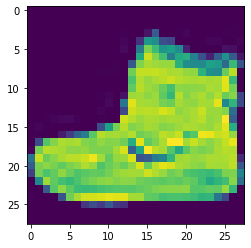

In [15]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

## Normalizing
If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called '**normalizing**'...and fortunately in Python it's easy to normalize a list like this without looping. You do it like this:

In [0]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

## Model 

**Sequential**: That defines a SEQUENCE of layers in the neural network

**Flatten**: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

**Dense**: Adds a layer of neurons

**activation function**: Each layer of neurons need an activation function to tell them what to do. There's lots of options, but just use these for now. 

**Relu**: effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

*Softmax* takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!

In [0]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


**Few Questions:**<br>
1.Increase to 1024 Neurons -- What's the impact?
By adding more Neurons we have to do more calculations, slowing down the process, but in this case they have a good impact -- we do get more accurate. That doesn't mean it's always a case of 'more is better', you can hit the law of diminishing returns very quickly!

2.What would happen if you remove the Flatten() layer. Why do you think that's the case?

You get an error about the shape of the data. It may seem vague right now, but it reinforces the rule of thumb that the first layer in your network should be the same shape as your data. Right now our data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to 'flatten' that 28,28 into a 784x1. Instead of wriitng all the code to handle that ourselves, we add the Flatten() layer at the begining, and when the arrays are loaded into the model later, they'll automatically be flattened for us.

3.Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10? For example, try training the network with 5

You get an error as soon as it finds an unexpected value. Another rule of thumb -- the number of neurons in the last layer should match the number of classes you are classifying for. In this case it's the digits 0-9, so there are 10 of them, hence you should have 10 neurons in your final layer.

4.Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10. 

Ans: There isn't a significant impact -- because this is relatively simple data. For far more complex data (including color images to be classified as flowers that you'll see in the next lesson), extra layers are often necessary.

5.Consider the impact of training for more or less epochs. Why do you think that would be the case? 

Try 15 epochs -- you'll probably get a model with a much better loss than the one with 5
Try 30 epochs -- you might see the loss value stops decreasing, and sometimes increases. This is a side effect of something called 'overfitting' which you can learn about [somewhere] and it's something you need to keep an eye out for when training neural networks. There's no point in wasting your time training if you aren't improving your loss, right! :)

## Custom Callbacks
To handle the lot of things that are output while model is fitting labels to data, for that we can handle it using custom callback function.
Also we can stop training our models after they reach some perticular accuracy

In [0]:
class CustomCallBack(tf.keras.callbacks.Callback):
    def __init__(self, epochs):
        self.epochs = epochs

    def set_params(self, params):
        params['epochs'] = 0

    def on_epoch_begin(self, epoch, logs=None):
        print('Epoch %d/%d' % (epoch + 1, self.epochs), end='')

    def on_epoch_end(self, epoch, logs={}):
        print(logs.get('accuracy'))
        if(logs.get('accuracy')>0.92):
          print("\nReached 92% accuracy so cancelling training!")
          self.model.stop_training = True

## Fit the model
Figure out the relationship between the training data and its actual labels, so in future if you have data that looks like the training data, then it can make a prediction for what that data would look like. 

In [19]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=50, verbose=2, callbacks=[CustomCallBack(50)])

Epoch 1/500.8237333297729492
1875/1875 - 3s - loss: 0.5008 - accuracy: 0.8237
Epoch 2/500.8617833256721497
1875/1875 - 3s - loss: 0.3814 - accuracy: 0.8618
Epoch 3/500.8761833310127258
1875/1875 - 3s - loss: 0.3428 - accuracy: 0.8762
Epoch 4/500.883400022983551
1875/1875 - 3s - loss: 0.3174 - accuracy: 0.8834
Epoch 5/500.8897500038146973
1875/1875 - 3s - loss: 0.2988 - accuracy: 0.8898
Epoch 6/500.8942166566848755
1875/1875 - 3s - loss: 0.2825 - accuracy: 0.8942
Epoch 7/500.8996166586875916
1875/1875 - 3s - loss: 0.2711 - accuracy: 0.8996
Epoch 8/500.9015499949455261
1875/1875 - 3s - loss: 0.2602 - accuracy: 0.9015
Epoch 9/500.9073833227157593
1875/1875 - 3s - loss: 0.2482 - accuracy: 0.9074
Epoch 10/500.9093166589736938
1875/1875 - 3s - loss: 0.2414 - accuracy: 0.9093
Epoch 11/500.9121166467666626
1875/1875 - 3s - loss: 0.2340 - accuracy: 0.9121
Epoch 12/500.9156000018119812
1875/1875 - 3s - loss: 0.2253 - accuracy: 0.9156
Epoch 13/500.9179499745368958
1875/1875 - 3s - loss: 0.2179 - 

## Evaluate
Once it's done training -- you should see an accuracy value at the end of the final epoch. It might look something like 0.89. This tells you that your neural network is about 89% accurate in classifying the training data. I.E., it figured out a pattern match between the image and the labels that worked 91% of the time. Not great, but not bad considering it was only trained for 5 epochs and done quite quickly.

But how would it work with unseen data? That's why we have the test images. We can call model.evaluate, and pass in the two sets, and it will report back the loss for each. Let's give it a try:

In [20]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 2ms/step - loss: 0.3319 - accuracy: 0.8874


[0.33189547061920166, 0.8873999714851379]

In [21]:
classifications = model.predict(test_images)

print(classifications[0])

[7.7376819e-07 2.8314386e-08 2.3449859e-07 5.0632789e-06 3.2505232e-06 2.1666738e-03 1.1254042e-04 3.4810893e-02 3.6766712e-06 9.6289682e-01]


The output of the model is a list of 10 numbers. These numbers are a probability that the value being classified is the corresponding value, i.e. the first value in the list is the probability that the handwriting is of a '0', the next is a '1' etc. Notice that they are all VERY LOW probabilities.


In [22]:
print(test_labels[0])

9


Both the list and the labels are 0 based, so the ankle boot having label 9 means that it is the 10th of the 10 classes. The list having the 10th element being the highest value means that the Neural Network has predicted that the item it is classifying is most likely an ankle boot

*********************************************************************************************

# **4. Computer Vision - Handwritten Digits MNIST**
Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy.

Some notes:
1. It should succeed in less than 10 epochs, so it is okay to change epochs= to 10, but nothing larger
2. When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"
3. If you add any additional variables, make sure you use the same names as the ones used in the class

I've started the code for you below -- how would you finish it? 

In [0]:
import tensorflow as tf
from os import path, getcwd, chdir

11493376/11490434 [==============================] - 0s 0us/step
Number of unique labels:  10

Label:  5

Image array:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  

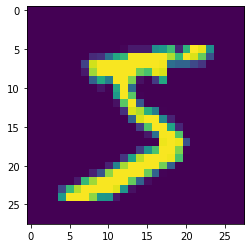

In [24]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Number of unique labels: ", len(np.unique(y_train)))
print("\nLabel: ", y_train[0])
print("\nImage array:\n", x_train[0])

print("\n Actual  Image:")
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(x_train[0]);

In [0]:
def train_mnist():

    class CustomCallBack(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            print(logs.get('accuracy'))               # To note: in some envs we use 'acc' instead of 'accuracy'
            if(logs.get('accuracy')>0.99):
                print("\nReached 99% accuracy so cancelling training!")
                self.model.stop_training = True

    mnist = tf.keras.datasets.mnist

    (x_train, y_train),(x_test, y_test) = mnist.load_data()

    x_train = x_train/255
    x_test = x_test/255                               # To note: we normalize image data not the image labels
    
    model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    # model fitting
    history = model.fit(x_train, y_train, epochs=10, callbacks=[CustomCallBack()])
    print("\n Evaluated Scores: [loss, accuracy]", model.evaluate(x_test, y_test))
    # model fitting
    return history.history['accuracy'][-1]

In [26]:
train_mnist()

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1986 - accuracy: 0.9427
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0798 - accuracy: 0.9761
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0527 - accuracy: 0.9837
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0364 - accuracy: 0.9885
Epoch 5/10
1863/1875 [============================>.] - ETA: 0s - loss: 0.0269 - accuracy: 0.99110.9910500049591064

Reached 99% accuracy so cancelling training!
313/313 [==============================] - 0s 2ms/step - loss: 0.0681 - accuracy: 0.9803

 Evaluated Scores: [loss, accuracy] [0.06812041997909546, 0.9803000092506409]


0.9910500049591064

# **5. Convolutional Neral Network**


How do you make that accuracy better? One way is to use something called Convolutions.

If you've ever done image processing using a filter (like this: https://en.wikipedia.org/wiki/Kernel_(image_processing)) then convolutions will look very familiar.

In short, you take an array (usually 3x3 or 5x5) and pass it over the image. By changing the underlying pixels based on the formula within that matrix, you can do things like edge detection. So, for example, if you look at the above link, you'll see a 3x3 that is defined for edge detection where the middle cell is 8, and all of its neighbors are -1. In this case, for each pixel, you would multiply its value by 8, then subtract the value of each neighbor. Do this for every pixel, and you'll end up with a new image that has the edges enhanced.

This is perfect for computer vision, because often it's features that can get highlighted like this that distinguish one item for another, and the amount of information needed is then much less...because you'll just train on the highlighted features.

That's the concept of Convolutional Neural Networks. Add some layers to do convolution before you have the dense layers, and then the information going to the dense layers is more focussed, and possibly more accurate.

Run the below code -- this is the same neural network as earlier, but this time with Convolutional layers added first. It will take longer, but look at the impact on the accuracy:

## Example for CNN
Convolution is the process of adding each element of the image to its local neighbors, weighted by the kernel.

In [27]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1) # convolution expects a single tensor containing everything, so instead of 60,000 28x28x1 items in a list, we have a single 4D list that is 60,000x28x28x1, and the same for the test images. If you don't do this, you'll get an error when training as the Convolutions do not recognize the shape. 
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)       # convolution expects a single tensor containing everything, so instead of 60,000 28x28x1 items in a list, we have a single 4D list that is 60,000x28x28x1, and the same for the test images. If you don't do this, you'll get an error when training as the Convolutions do not recognize the shape. 
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)


2.2.0-rc4
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_7 (Dense)              (None, 10)     

Now instead of the input layer at the top, you're going to add a Convolution. The parameters are:

1. The number of convolutions you want to generate. Purely arbitrary, but good to start with something in the order of 32
2. The size of the Convolution, in this case a 3x3 grid
3. The activation function to use -- in this case we'll use relu, which you might recall is the equivalent of returning x when x>0, else returning 0
4. In the first layer, the shape of the input data.

You'll follow the Convolution with a MaxPooling layer which is then designed to compress the image, while maintaining the content of the features that were highlighted by the convlution. By specifying (2,2) for the MaxPooling, the effect is to quarter the size of the image. Without going into too much detail here, the idea is that it creates a 2x2 array of pixels, and picks the biggest one, thus turning 4 pixels into 1. It repeats this across the image, and in so doing halves the number of horizontal, and halves the number of vertical pixels, effectively reducing the image by 25%.

You can call model.summary() to see the size and shape of the network, and you'll notice that after every MaxPooling layer, the image size is reduced in this way. 

Then add another convolution.

Now flatten the output. After this you'll just have the same DNN (Deep Nueral Network) structure as the non convolutional version.

TRY:

1. Try editing the convolutions. Change the 32s to either 16 or 64. What impact will this have on accuracy and/or training time.

2. Remove the final Convolution. What impact will this have on accuracy or training time?

3. How about adding more Convolutions? What impact do you think this will have? Experiment with it.

4. Remove all Convolutions but the first. What impact do you think this will have? Experiment with it. 

5. In the previous lesson you implemented a callback to check on the loss function and to cancel training once it hit a certain amount. See if you can implement that here!



## Visualize CNN

This code will show us the convolutions graphically. The print (test_labels[;100]) shows us the first 100 labels in the test set, and you can see that the ones at index 0, index 23 and index 28 are all the same value (9). They're all shoes. Let's take a look at the result of running the convolution on each, and you'll begin to see common features between them emerge. Now, when the DNN is training on that data, it's working with a lot less, and it's perhaps finding a commonality between shoes based on this convolution/pooling combination.

In [28]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4
 2]


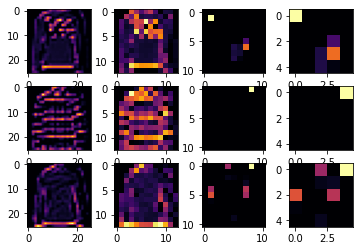

In [29]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=1
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 32
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)